<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session3/BMEN35_Ex10_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3
## Fill in your name below
----<font color=Green>Mosa Hosseini </font>-----

## Your mission is now the following:

Part A) You will use sklearn to check if the Linear Regression model in the previous notebook is the same as the one in sklearn.

Part B) You will use sklearn to check if the Logistic Regression model in the previous note is the same as the one ine sklearn.

## When you have finished this assignment , save this notebook and submit it as assignment 3

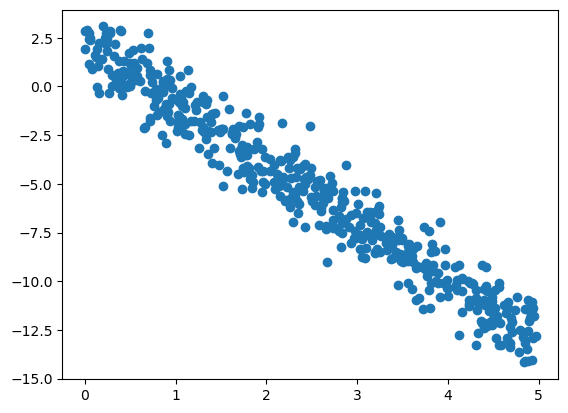

[[ 2.13404915]
 [-3.03222097]]
coeff =  [[-3.03222097]] intercept =  [2.13404915]


In [33]:
# Part A
import numpy as np
import matplotlib.pyplot as plt

# Lets start by making a simple example
N = 500 # Number of datapoints
X = 5 *np.random.rand(N,1)
y =  2 - 3 * X + np.random.randn(N,1)

# Lets make a scatter plot of the data to see what it looks like
plt.scatter(X,y)
plt.show()

# We add a column of ones for the intercept (theta0)
X_b = np.hstack((np.ones([N,1]),X))
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
print(theta)

# # Here is where your code starts. We will start you off with
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)
coeff = reg.coef_
intercept = reg.intercept_
print("coeff = ",  coeff , "intercept = " , intercept)

#both models produces the same parameters
# The reg object will have some parameters named .intercept_ and .coef_

In [69]:
# Part B
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Four features x1,x2,x3,x4 and two classes (binary classification)
X, y = make_classification(n_samples = 1000,n_features=4, n_classes = 2,random_state=0)
# Lets split the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train_i = np.c_[np.ones((np.shape(X_train)[0],1)),X_train] # Add 1 for intercept theta_0
X_test_i = np.c_[np.ones((np.shape(X_test)[0],1)),X_test] #Add 1 for intercept theta_0
theta = np.zeros((np.shape(X_train_i)[1])) # Intialize theta to zero
# Lets again use gradient descent to find the right values for theta
n_epochs = 200 # The number of epoch
eta = 0.01 # Our learning rate
J = np.zeros(n_epochs)
for i in range(n_epochs):
    theta_T_X = np.dot(X_train_i, theta)  # X*theta
    #p_hat = 1 / (1 + np.exp(-theta_T_X))  # We pass this through the logistic function
    p_hat = np.exp(theta_T_X) / (1 + np.exp(theta_T_X))
    error = y_train - p_hat
    J[i] = np.sum(-(y_train*np.log(p_hat) + (1-y_train)*np.log(1-p_hat)))/len(y_train)
    grad = np.dot(X_train_i.T, error)
    theta = theta + eta * grad

print(theta)
y_hat = 1 / (1 + np.exp(-np.dot(X_test_i, theta))) # Calculate probabilities using our thetas.
y_hat = np.round(y_hat) # Easy cheat instead of using if statements or similar
acc = np.sum(y_hat == y_test)/len(y_test) # Calculate accuracy
print(acc)

# Here is where your code start. We will start you off with
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression().fit(X_train , y_train)# Start filling in some code

thetas = list(clf.coef_[0])

thetas.insert(0,clf.intercept_[0])

print(  " intercept = " , clf.intercept_,"coef = " , clf.coef_)

y_hatt = clf.predict(X_test)

accuracy_score(y_hatt, y_test)

# The reg object will have some parameters named .intercept_ and .coef_ print them
# Also predict based on Xtest and calculate accuracy to compare with the above code

#The accuracy is the same but that coefficients differs a little bit , this is Ok 
# because gradient decsent is a numerical solution and give the values close to the real 
#value but not nessessarely the same.

[ 0.83187177  2.40112862 -0.07310521  1.09701541  1.71209168]
0.956
 intercept =  [0.72929775] coef =  [[ 2.22266243 -0.05164397  1.00240911  1.59078548]]


0.956